Features sorted by their score:
[(0.17, 'proline'), (0.16, 'flavanoids'), (0.16, 'color_intensity'), (0.12, 'od280/od315_of_diluted_wines'), (0.12, 'alcohol'), (0.07, 'hue'), (0.05, 'total_phenols'), (0.03, 'malic_acid'), (0.03, 'magnesium'), (0.03, 'alcalinity_of_ash'), (0.02, 'proanthocyanins'), (0.01, 'nonflavanoid_phenols'), (0.01, 'ash')]


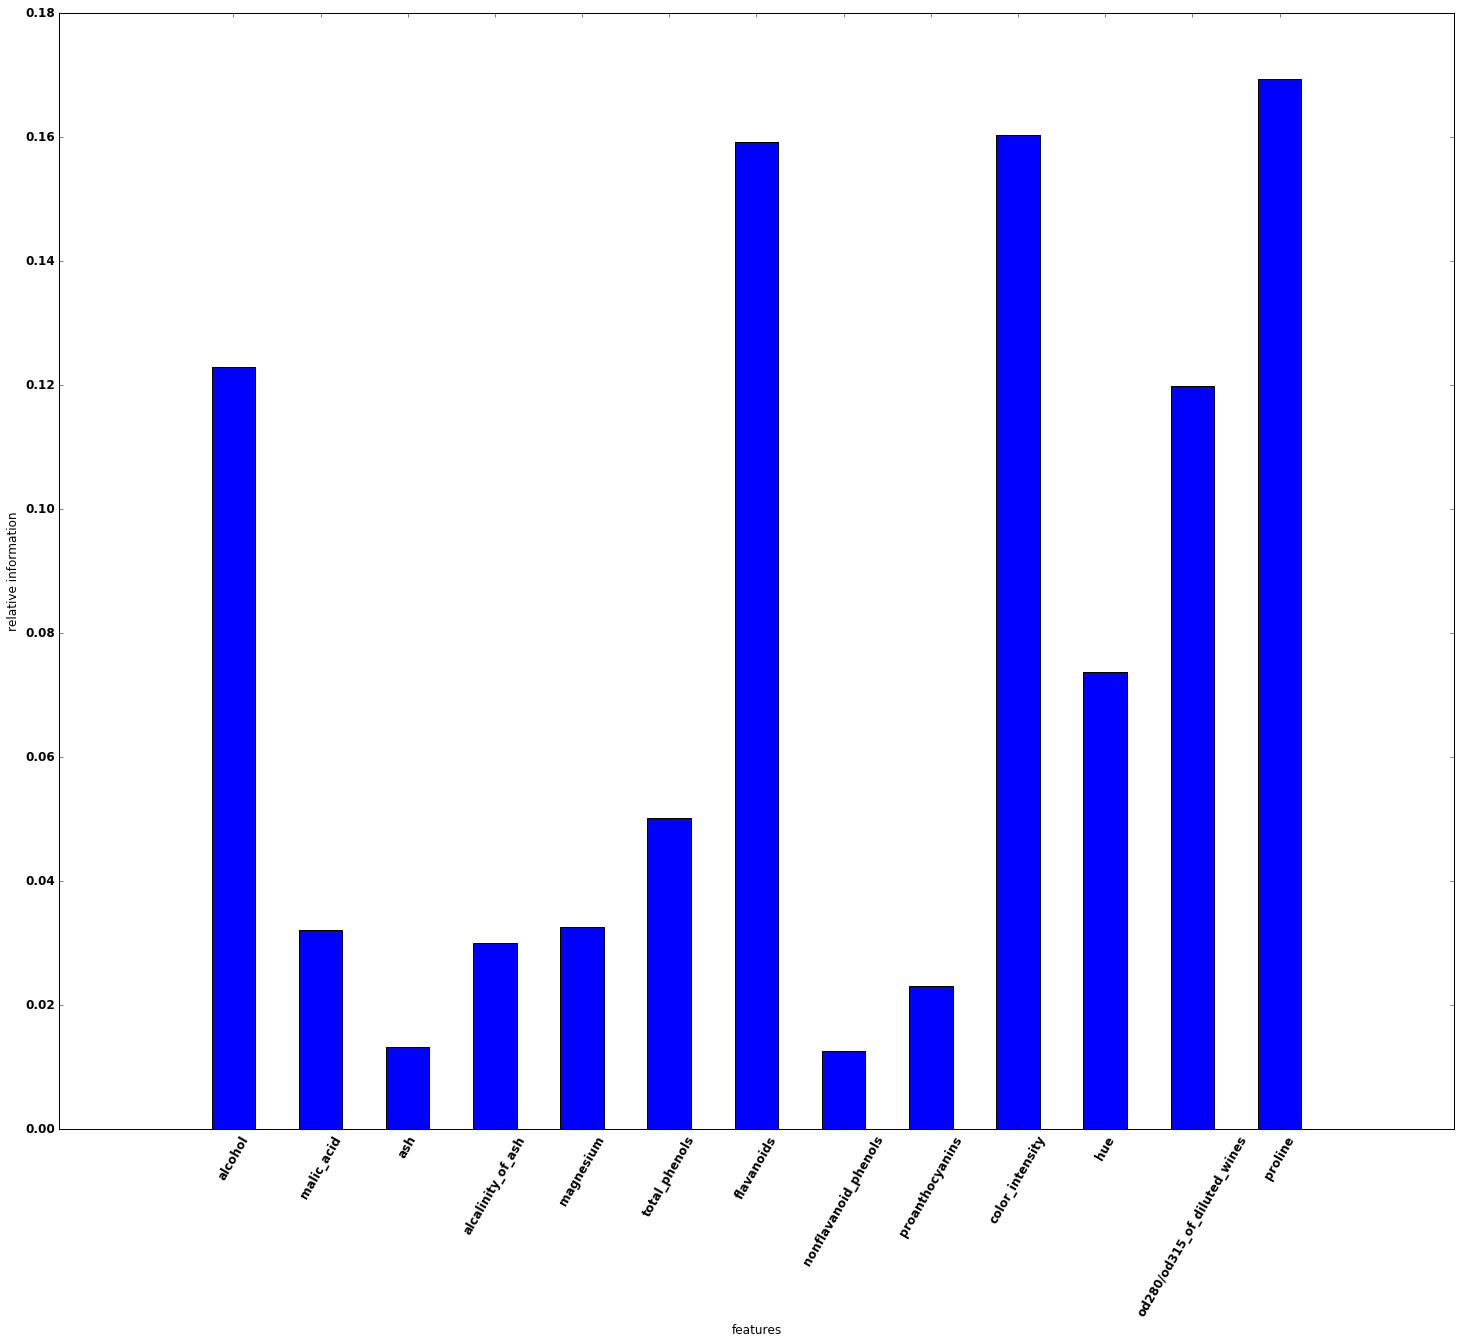

In [4]:
from sklearn.datasets import load_wine
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib
import matplotlib.pyplot as plt
import numpy

### single feature information evaluation
n_trees = 1000
wine = load_wine()
X = wine["data"]
Y = wine["target"]
features = wine["feature_names"]
rf = RandomForestClassifier(n_trees)
rf.fit(X, Y)
plt_x = numpy.linspace(0,len(features)-1,len(features))
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: float("{0:.2f}".format(round(x, 4))), rf.feature_importances_), features),
             reverse=True))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

plt.figure(figsize=(25,20))

plt.bar(plt_x, rf.feature_importances_, width=0.5, color="blue",align='center')
plt.gca().set_xticklabels(plt_x, rotation=60 )
plt.xticks(plt_x, features)
plt.ylabel("relative information")
plt.xlabel("features")
plt.show()

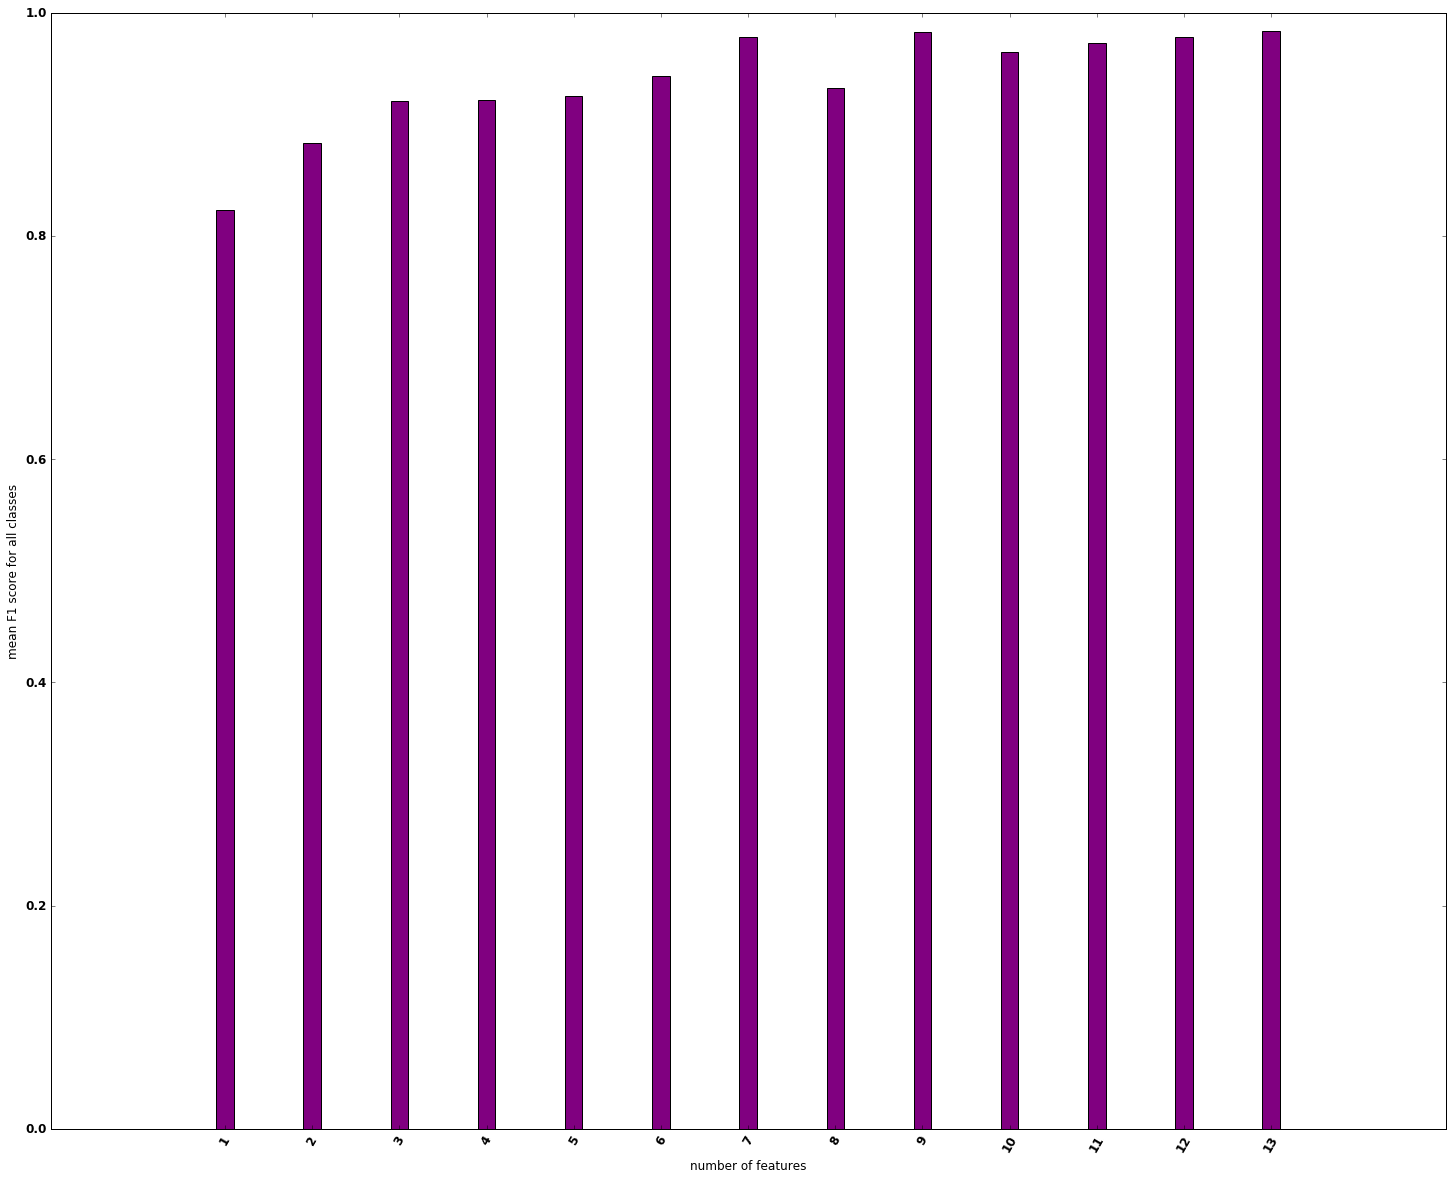

In [5]:
### F1-score sweep over features
F1 = []
plt_x = numpy.linspace(0,len(features)-1,len(features))
n_trees = 1 # set n_trees to a limiting small number to find out features' effect on constrained models
for i in range(len(features)):
    rf = RandomForestClassifier(n_trees, max_features = i+1)
    rf.fit(X[:,:i+1], Y)
    Y_pred = rf.predict(X[:,:i+1])
    F1.append(numpy.mean(f1_score(Y,Y_pred, average  = None)))
plt.figure(figsize=(25,20))

plt.bar(plt_x, F1, width=0.2, color="purple",align='center')

plt.gca().set_xticklabels(plt_x, rotation=60 )
plt.xticks(plt_x, [ int(x+1) for x in plt_x ])

plt.ylabel("mean F1 score for all classes")
plt.xlabel("number of features")

plt.show()